<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Ход-выполнения-проекта" data-toc-modified-id="Ход-выполнения-проекта-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Ход выполнения проекта</a></span></li></ul></li><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span></li><li><span><a href="#Обучение-и-проверки-моделей" data-toc-modified-id="Обучение-и-проверки-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение и проверки моделей</a></span><ul class="toc-item"><li><span><a href="#Разделение-данных-на-выборки" data-toc-modified-id="Разделение-данных-на-выборки-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Разделение данных на выборки</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение моделей</a></span></li><li><span><a href="#Расчет-показателей-модели" data-toc-modified-id="Расчет-показателей-модели-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Расчет показателей модели</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Подготовка-к-расчету-прибыли" data-toc-modified-id="Подготовка-к-расчету-прибыли-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Подготовка к расчету прибыли</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчет-прибыли-и-рисков" data-toc-modified-id="Расчет-прибыли-и-рисков-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Расчет прибыли и рисков</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Определение места для бурения новой скважины  

## Описание проекта  

**Заказчик:** добывающая компания «ГлавРосГосНефть».   
**Задача:** решить, где бурить новую скважину.   

Шаги для выбора локации:  
* В избранном регионе собирают характеристики для скважин: качество нефти и объём её запасов;
* Строят модель для предсказания объёма запасов в новых скважинах;
* Выбирают скважины с самыми высокими оценками значений;
* Определяют регион с максимальной суммарной прибылью отобранных скважин.  

В исходных данных предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны.   

Необходимо построить модель для определения региона, где добыча принесёт наибольшую прибыль. Проанализировать возможную прибыль и риски техникой *Bootstrap*.   

### Описание данных  

Данные геологоразведки трёх регионов находятся в файлах: 
* `/datasets/geo_data_0.csv.`
* `/datasets/geo_data_1.csv.`
* `/datasets/geo_data_2.csv.`
* `id` — уникальный идентификатор скважины;
* `f0`, `f1`, `f2` — три признака точек (неважно, что они означают, но сами признаки значимы);
* `product` — объём запасов в скважине (тыс. баррелей).  

**Условия задачи:**  
* Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
* При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
* Бюджет на разработку скважин в регионе — 10 млрд рублей.
* При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
* После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.  

Данные синтетические: детали контрактов и характеристики месторождений не разглашаются.  

### Ход выполнения проекта  

Исследование и проект будет состоять из 5 шагов:  
1. Загрузим и подготовим данные
2. Обучим и проверим модель линейной регрессии  
3. Подготовим к расчету прибыли
4. Расчитаем прибыль и риски  
5. Напишем общий вывод

## Загрузка и подготовка данных

In [1]:
# установим модуль для графиков RainCloud
!pip install ptitprince

In [2]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ptitprince as pt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle

import warnings

In [3]:
# увеличим максимальное количество отображаемых столбцов
pd.set_option('display.max_columns', None)

# Задаем количество знаков после запятой для всех значений в датафрейме
pd.set_option('float_format', '{:.2f}'.format) 

# Вывести из под комментария перед финальным запуском:
# Игнорируем предупреждения о возможных изменения работы функций в будущих версиях в Pandas
warnings.filterwarnings("ignore") 

In [4]:
# считывание csv-файлов
try: 
    main_df_0 = pd.read_csv('/datasets/geo_data_0.csv')
    main_df_1 = pd.read_csv('/datasets/geo_data_1.csv')
    main_df_2 = pd.read_csv('/datasets/geo_data_2.csv')
except:
    main_df_0 = pd.read_csv('geo_data_0.csv')
    main_df_1 = pd.read_csv('geo_data_1.csv')
    main_df_2 = pd.read_csv('geo_data_2.csv')

Зададим значение `random_state` и `test_size`, которое будет использоваться на протяжении всего проекта. 

In [5]:
RANDOM_STATE = 12345
TEST_SIZE = 0.25

Сначала создадим копию датафреймов, чтобы убедиться в том, что данные не испорчены после подготовки.

In [6]:
df_0 = main_df_0.copy(deep=True)
df_1 = main_df_1.copy(deep=True)
df_2 = main_df_2.copy(deep=True)

Для вывода общей информации по каждому датафрейму напишем функцию:

In [7]:
def description_df(df, region):
    '''
    Выводит первые 5 строк датафрейма, общую информацию о датафрейме,
    показывает описание количественных признаков, проверяет наличие дубликатов
    и строит таблицу корреляции
    '''
    # выведем номер региона
    print(region)
    
    # выведем общую информацию о таблице
    info = display(df.head()), df.info(), display(df.describe())
    
    # проверим наличие дубликатов
    if df.duplicated().sum() == 0:
        print(region, ": Дубликатов не обнаружено")
    else: 
        print(region, ": Дубликатов обнаружено: {}".format(df.duplicated().sum()))
       
    # построим таблицу корреляции признаков
    plt.figure(figsize=(4, 4))
    plt.title(region, fontsize=16)
    sns.heatmap(df.corr(),
            annot=True,
            vmin=-1, vmax=1, center=0,
            cbar=False, robust=True,
            cmap='coolwarm', linewidth=0.2);    

In [8]:
def rain_cloud(df, region):
    """
    Строит ящик с усами, стрип-плот и KDE-плот
    на одном графике для каждого столбца
    """
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 15))
    pal = sns.color_palette("tab10", 10)
    
    
    pt.RainCloud(y=df["f0"], data=df["f0"], bw=0.15, cut=0, orient='h', width_box=0.05,
             width_viol=0.25, palette = [pal[8]], ax=ax1);
    ax1.set_xlabel('значения f0', fontsize=15)
    ax1.set_ylabel('f0', fontsize=20)
    pt.RainCloud(y=df["f1"], data=df["f1"], bw=0.15, cut=0, orient='h', width_box=0.05,
             width_viol=0.25, palette = [pal[6]], ax=ax2);
    ax2.set_xlabel('значения f1', fontsize=15)
    ax2.set_ylabel('f1', fontsize=20)
    pt.RainCloud(y=df["f2"], data=df["f2"], bw=0.15, cut=0, orient='h', width_box=0.05,
             width_viol=0.25, palette = [pal[4]], ax=ax3);
    ax3.set_xlabel('значения f2', fontsize=15)
    ax3.set_ylabel('f2', fontsize=20)
    pt.RainCloud(y=df["product"], data=df["product"], bw=0.15, cut=0, orient='h', width_box=0.05,
             width_viol=0.25, palette = [pal[2]], ax=ax4);
    ax4.set_xlabel('тыс.баррелей', fontsize=15)
    ax4.set_ylabel('product', fontsize=20)
    
    fig.suptitle(region, fontsize=25)
    plt.tight_layout()

Первый регион


,id,f0,f1,f2,product
0,txEyH,0.71,-0.50,1.22,105.28
1,2acmU,1.33,-0.34,4.37,73.04
2,409Wp,1.02,0.15,1.42,85.27
3,iJLyR,-0.03,0.14,2.98,168.62
4,Xdl7t,1.99,0.16,4.75,154.04


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,f0,f1,f2,product
count,100000.00,100000.00,100000.00,100000.00
mean,0.50,0.25,2.50,92.50
std,0.87,0.50,3.25,44.29
min,-1.41,-0.85,-12.09,0.00
25%,-0.07,-0.20,0.29,56.50
50%,0.50,0.25,2.52,91.85
75%,1.07,0.70,4.72,128.56
max,2.36,1.34,16.00,185.36


Первый регион : Дубликатов не обнаружено


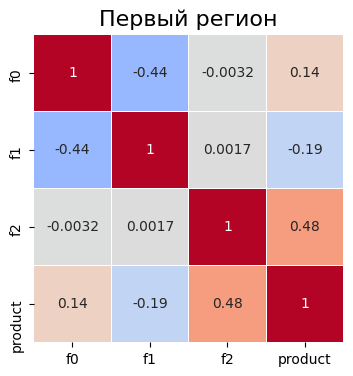

In [9]:
# Выведем описание первого региона
description_df(df_0, 'Первый регион')

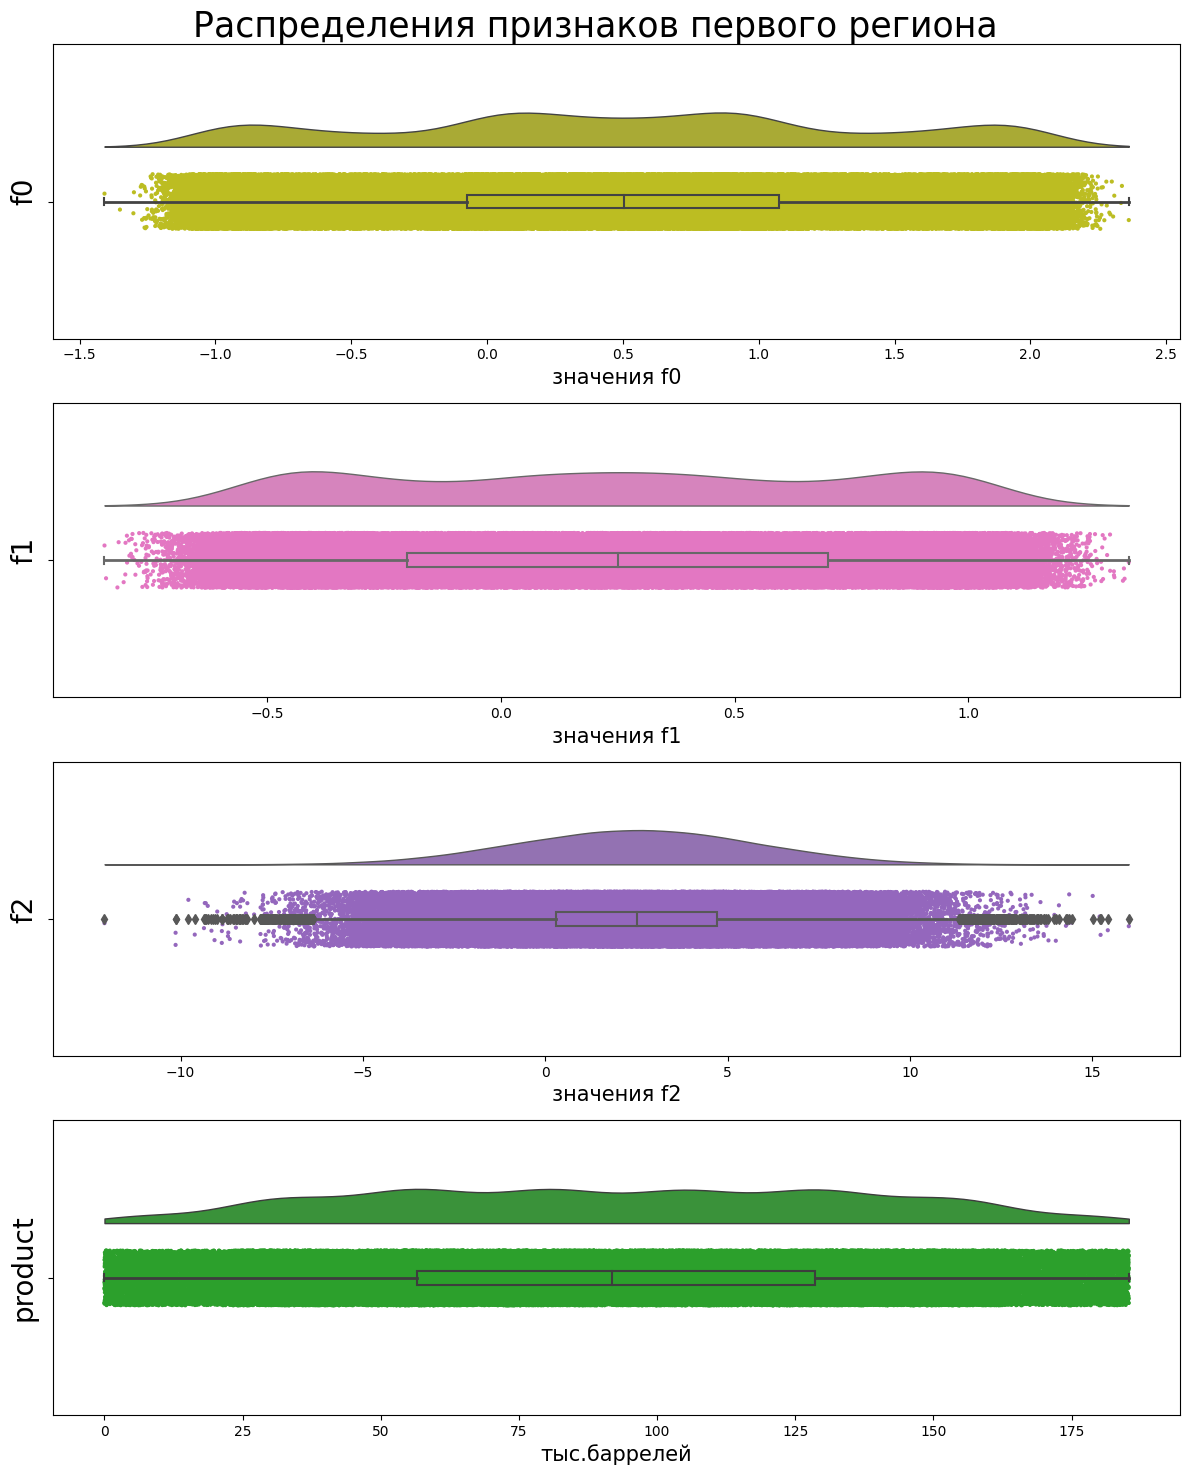

In [10]:
rain_cloud(df_0, 'Распределения признаков первого региона')

В первой таблице выбросы содержит только столбец `f2`. Значения всех столбцов распределены нормально.

Второй регион


,id,f0,f1,f2,product
0,kBEdx,-15.00,-8.28,-0.01,3.18
1,62mP7,14.27,-3.48,1.00,26.95
2,vyE1P,6.26,-5.95,5.00,134.77
3,KcrkZ,-13.08,-11.51,5.00,137.95
4,AHL4O,12.70,-8.15,5.00,134.77


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,f0,f1,f2,product
count,100000.00,100000.00,100000.00,100000.00
mean,1.14,-4.80,2.49,68.83
std,8.97,5.12,1.70,45.94
min,-31.61,-26.36,-0.02,0.00
25%,-6.30,-8.27,1.00,26.95
50%,1.15,-4.81,2.01,57.09
75%,8.62,-1.33,4.00,107.81
max,29.42,18.73,5.02,137.95


Второй регион : Дубликатов не обнаружено


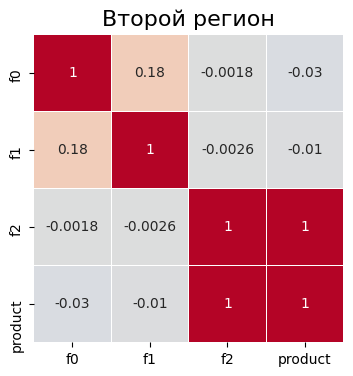

In [11]:
# Выведем описание второго региона
description_df(df_1, 'Второй регион')

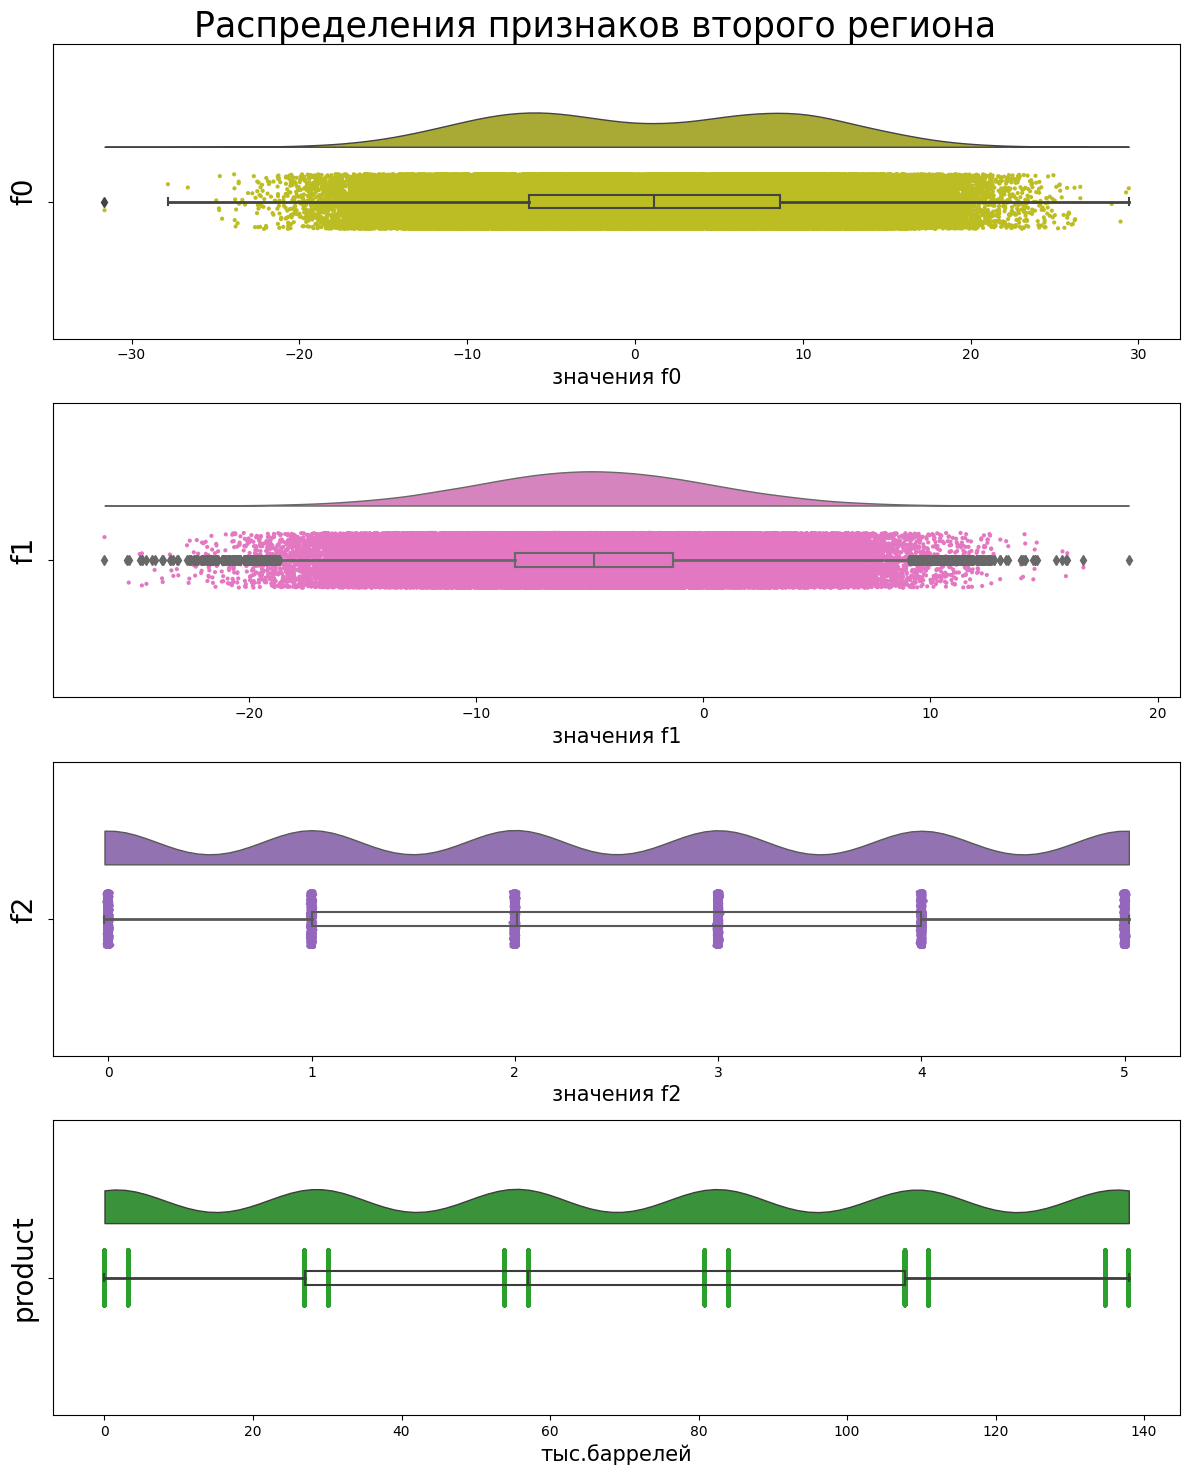

In [12]:
rain_cloud(df_1, 'Распределения признаков второго региона')

Для второй таблицы выбросы содержатся в столбцах `f0` и `f1`. Отчетливо видно, что предоставлены синтетические данные по распределениям столбцов `f2` и `product`.

Третий регион


,id,f0,f1,f2,product
0,fwXo0,-1.15,0.96,-0.83,27.76
1,WJtFt,0.26,0.27,-2.53,56.07
2,ovLUW,0.19,0.29,-5.59,62.87
3,q6cA6,2.24,-0.55,0.93,114.57
4,WPMUX,-0.52,1.72,5.90,149.60


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,f0,f1,f2,product
count,100000.00,100000.00,100000.00,100000.00
mean,0.00,-0.00,2.50,95.00
std,1.73,1.73,3.47,44.75
min,-8.76,-7.08,-11.97,0.00
25%,-1.16,-1.17,0.13,59.45
50%,0.01,-0.01,2.48,94.93
75%,1.16,1.16,4.86,130.60
max,7.24,7.84,16.74,190.03


Третий регион : Дубликатов не обнаружено


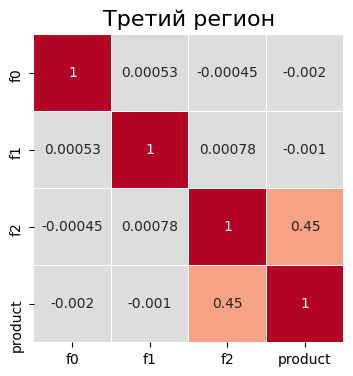

In [13]:
# Выведем описание третьего региона
description_df(df_2, 'Третий регион')

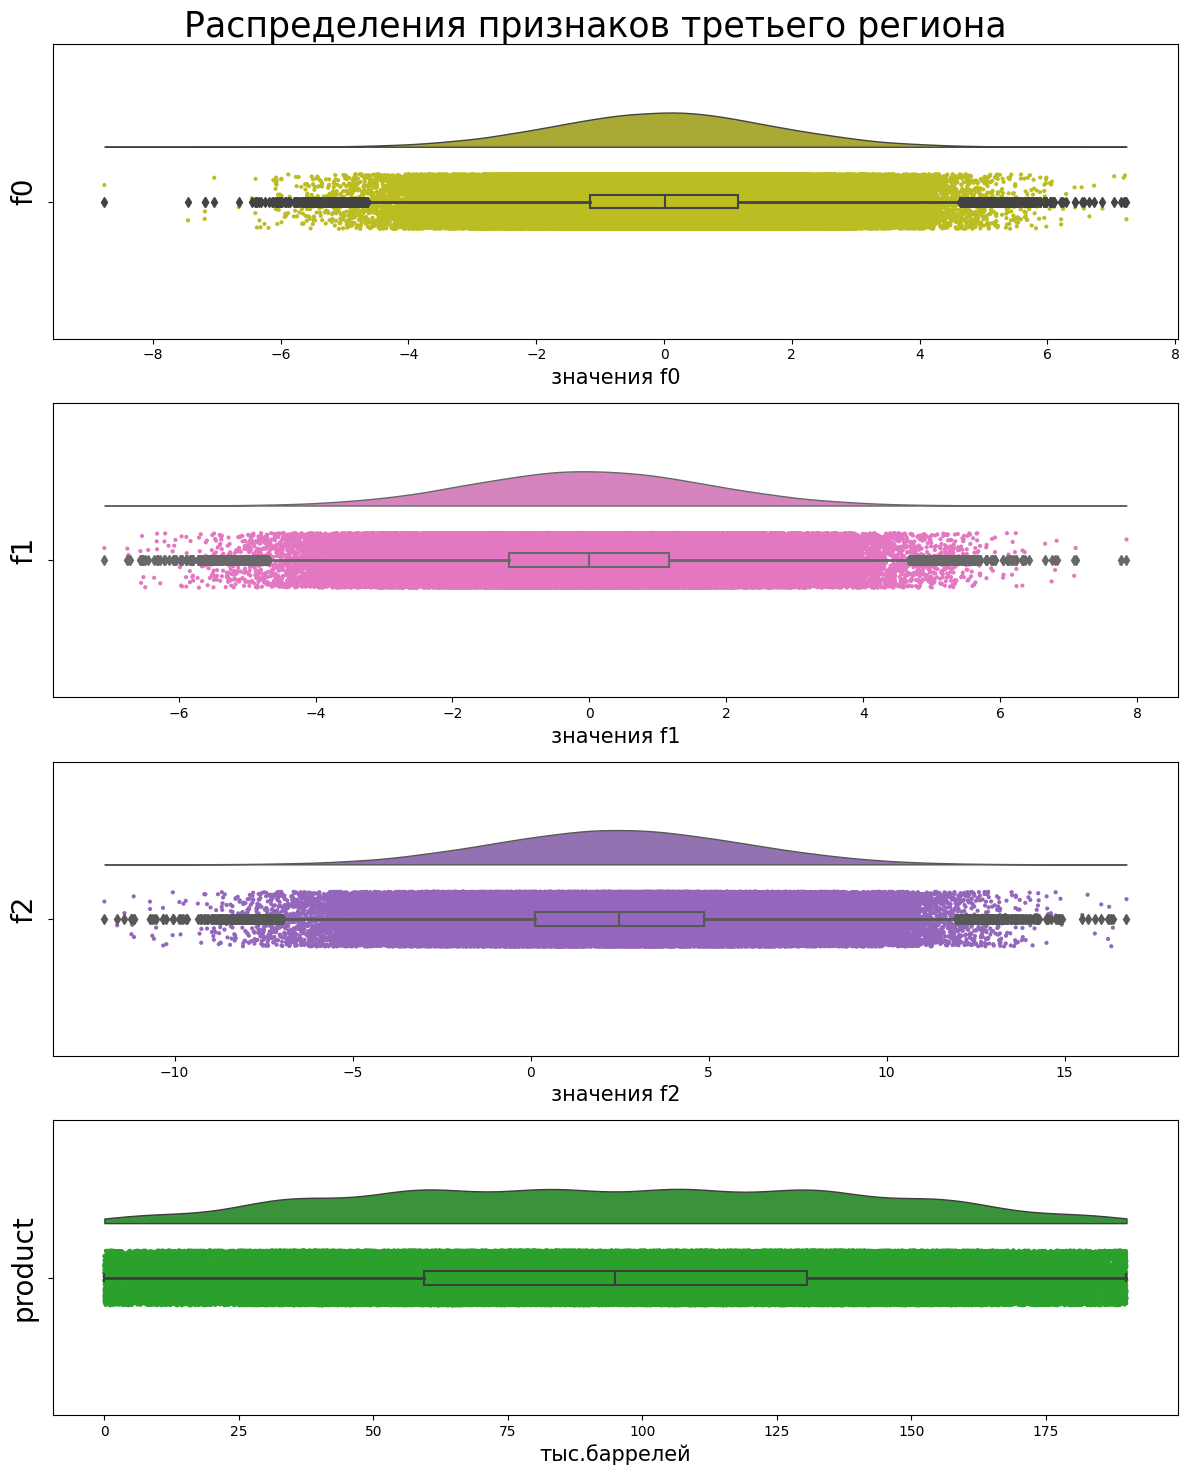

In [14]:
rain_cloud(df_2, 'Распределения признаков третьего региона')

Для третьей таблицы выбросы содержатся в столбцах `f0`, `f1` и `f2`. Данные во всех столбцах распределены нормально.

Проверим неявные дубликаты в уникальных идентификаторах скажин (столбец `id`):

In [15]:
def dup_id(df, region):
    # Выведем кол-во дубликатов
    dup_sum = df['id'].duplicated().sum()
    print('Кол-во дубликатов "id" в регионе {}: {}'.format(region, dup_sum))
    # Выведем строки в дубликатами в столбце 'id'
    dup_rows = df[df['id'].duplicated()]
    print("\nПовторяющиеся строки с дубликатами 'id' региона {}: \n {}".format(region, dup_rows))

In [16]:
dup_id(df_0, 1)

Кол-во дубликатов "id" в регионе 1: 10

Повторяющиеся строки с дубликатами 'id' региона 1: 
           id    f0    f1    f2  product
7530   HZww2  1.06 -0.37 10.43   158.83
41724  bxg6G -0.82  0.55  3.63    93.01
51970  A5aEY -0.18  0.94 -2.09    33.02
63593  QcMuo  0.64 -0.47  0.86    64.58
66136  74z30  1.08 -0.31  6.99   127.64
69163  AGS9W -0.93  0.12 -3.66    19.23
75715  Tdehs  0.11  0.43  3.22    60.96
90815  fiKDv  0.05  0.84  6.39   137.35
92341  TtcGQ  0.11  1.02  0.91   101.32
97785  bsk9y  0.38  0.01  0.16   160.64


In [17]:
dup_id(df_1, 2)

Кол-во дубликатов "id" в регионе 2: 4

Повторяющиеся строки с дубликатами 'id' региона 2: 
           id    f0    f1   f2  product
41906  LHZR0 -8.99 -4.29 2.01    57.09
82178  bfPNe -6.20 -4.82 3.00    84.04
82873  wt4Uk 10.26 -9.38 4.99   134.77
84461  5ltQ6 18.21  2.19 3.99   107.81


In [18]:
dup_id(df_2, 3)

Кол-во дубликатов "id" в регионе 3: 4

Повторяющиеся строки с дубликатами 'id' региона 3: 
           id    f0   f1   f2  product
43233  xCHr8 -0.85 2.10 5.60   184.39
49564  VF7Jo -0.88 0.56 0.72   136.23
55967  KUPhW  1.21 3.18 5.54   132.83
95090  Vcm5J  2.59 1.99 2.48    92.33


Видим, что в данных присутствуют скважины с одинаковыми идентификаторами, но разными признаками. Т.к. их число невелико - удалим их.

In [19]:
# Удалим дубликаты и выведем размеры изменившихся датафреймов
df_0 = df_0.drop_duplicates(subset='id')
display(df_0.shape)
df_1 = df_1.drop_duplicates(subset='id')
display(df_1.shape)
df_2 = df_2.drop_duplicates(subset='id')
display(df_2.shape)

(99990, 5)

(99996, 5)

(99996, 5)

In [20]:
# Проверим кол-во отбросанных значений
display(df_0.shape[0] / main_df_0.shape[0])
display(df_1.shape[0] / main_df_1.shape[0])
display(df_2.shape[0] / main_df_2.shape[0])

0.9999

0.99996

0.99996

Отбросили около 0.01% в каждом датафрейме, что не является критическим и не повлияет на дальнейших ход проекта.

**Выводы:**  
1. Каждый датафрейм содержит по 100тыс. значений в таблице, в каждом 5 столбцов, пропуски в данных отсутствуют.
2. Дубликаты в таблице каждого региона также отсутствуют.
3. Названия столбцов и типы данных корректны.
4. По таблицам коррелляции всех трех регионов четко прослеживает взаимосвязь между столбцами `f2` и `product`. Для второго региона данная взаимосвязь черезчур неправдоподобна и равна 1, вероятнее всего такое произошло из-за того, что предоставлены синтетические данные. Взаимосвязи между другими столбцами отсутствуют.
5. Устранили дубликаты в столбце `id` каждого датафрейма.

## Обучение и проверки моделей

### Разделение данных на выборки

Затем напишем функцию для выделения признаков и целевого признака, а также разделения данных на выборки.

In [21]:
def split_df(df):
    '''
    Выделяет из датафрейма признаки и целевой признак,
    а также разделяет выборку на валидационную и обучающую
    '''
    # Выделим признаки и целевой признак
    features = df.drop(['id', 'product'], axis=1)
    target = df['product']
    # Разделим выборку на обучающую и валидационную
    (features_train, 
     features_valid, 
     target_train, 
     target_valid) = train_test_split(features,
                                     target,
                                     test_size=TEST_SIZE,
                                     random_state=RANDOM_STATE)
    # Выведем размер выборок
    print("Размер обучающей выборки:", features_train.shape)
    print("Размер валидационной выборки:", features_valid.shape)
    
    return (features, target,
           features_train, target_train,
           features_valid, target_valid)

Разделим выборки с помощью написанной функции:

In [22]:
# Первый регион
(features_0, target_0,
 features_train_0, target_train_0,
 features_valid_0, target_valid_0) = split_df(df_0)

Размер обучающей выборки: (74992, 3)
Размер валидационной выборки: (24998, 3)


In [23]:
# Второй регион
(features_1, target_1,
 features_train_1, target_train_1,
 features_valid_1, target_valid_1) = split_df(df_1)

Размер обучающей выборки: (74997, 3)
Размер валидационной выборки: (24999, 3)


In [24]:
# Третий регион
(features_2, target_2,
 features_train_2, target_train_2,
 features_valid_2, target_valid_2) = split_df(df_2)

Размер обучающей выборки: (74997, 3)
Размер валидационной выборки: (24999, 3)


### Обучение моделей

Для обучения моделей и получения предсказаний на валидационной выборке напишем функцию:

In [25]:
def model_train(features_train, target_train, features_valid, target_valid):
    '''
    Обучает модель и получает предсказания на валидационной выборке
    '''
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions_valid = pd.Series(model.predict(features_valid), index=target_valid.index)
    
    return predictions_valid

In [26]:
# Получим предсказания первого региона
predictions_valid_0 = model_train(features_train_0, target_train_0, features_valid_0, target_valid_0)

# Получим предсказания второго региона
predictions_valid_1 = model_train(features_train_1, target_train_1, features_valid_1, target_valid_1)

# Получим предсказания третьего региона
predictions_valid_2 = model_train(features_train_2, target_train_2, features_valid_2, target_valid_2)

### Расчет показателей модели

Напишем функцию для расчета среднего запаса предсказанного сырья по региону и *RMSE* модели:

In [27]:
def model_metrics(predictions_valid, features_valid, target_valid):
    '''
    Рассчитывает RMSE модели, средний запас целевой и предсказанный
    '''
    rmse = mean_squared_error(target_valid, predictions_valid) ** 0.5
    product_target = target_valid.mean()
    product_prediction = predictions_valid.mean()
    
    print("RMSE модели: {:.2f}".format(rmse))
    print("Средний запас сырья целевой: {:.2f} тыс. баррелей".format(product_target))
    print("Средний запас сырья предсказанный: {:.2f} тыс. баррелей".format(product_prediction))
    
    return rmse, product_target, product_prediction

In [28]:
# Показатели первого региона
(rmse_0, product_target_0, product_prediction_0) = model_metrics(predictions_valid_0, 
                                                                 features_valid_0, 
                                                                 target_valid_0)

RMSE модели: 37.85
Средний запас сырья целевой: 92.16 тыс. баррелей
Средний запас сырья предсказанный: 92.79 тыс. баррелей


In [29]:
# Показатели второго региона
(rmse_1, product_target_1, product_prediction_1) = model_metrics(predictions_valid_1, 
                                                                 features_valid_1, 
                                                                 target_valid_1)

RMSE модели: 0.89
Средний запас сырья целевой: 69.19 тыс. баррелей
Средний запас сырья предсказанный: 69.18 тыс. баррелей


In [30]:
# Показатели третьего региона
(rmse_2, product_target_2, product_prediction_2) = model_metrics(predictions_valid_2, 
                                                                 features_valid_2, 
                                                                 target_valid_2)

RMSE модели: 40.08
Средний запас сырья целевой: 94.79 тыс. баррелей
Средний запас сырья предсказанный: 94.87 тыс. баррелей


### Выводы  

Объединим полученные результаты по трем регионам в одну сравнительную таблицу:

In [31]:
result_dict = {'RMSE': [rmse_0, rmse_1, rmse_2],
              'product_target': [product_target_0, product_target_1, product_target_2],
              'product_prediction': [product_prediction_0, product_prediction_1, product_prediction_2]}

result_df = pd.DataFrame(result_dict, index=['Регион 1', 'Регион 2', 'Регион 3'])

result_df

,RMSE,product_target,product_prediction
Регион 1,37.85,92.16,92.79
Регион 2,0.89,69.19,69.18
Регион 3,40.08,94.79,94.87


Исходя из полученных результатов можно сделать следующие выводы:  
* Показатели по первому и третьему региону примерно одинаковые, в третьем регионе средний запас сырья на 2,5 тыс. баррелей выше. Показатели второго региона сравнительное низкие.  
* Модель второго региона показала наихудшие результаты, хотя все модели обучались в равных условиях. Именно в данных второго региона при изучении общей информации было замечено, что данные синтетические (столбцы `f2` и `product`), вероятнее всего именно данный фактор повлиял на такие низкие показатели модели.

## Подготовка к расчету прибыли

Сохраним необходимые для расчета значения в отдельных переменных: 

In [32]:
# Бюджет на разработку скважин в регионе, руб.
BUDGET = 10 ** 10
# Количество точек для разведки региона
EXPLORED_POINTS = 500
# Количество лучших для разработки точек
TOP_POINTS = 200
# Цена одной тысячи баррелей нефти, руб.
PRICE = 450000
# Максимальная вероятность убытков
MAX_RISK = 0.025
# Миллион
MLN = 10 ** 6

Рассчитаем достаточный объем сырья для безубыточной разработки новой скважины:

In [33]:
product_min = BUDGET / (PRICE * TOP_POINTS)
product_min

111.11111111111111

### Вывод

* По результатам расчета, чтобы разработка одной скважины окупилась необходимо, чтобы в скважине было не менее 111.11 тыс. баррелей нефти.  
* Полученные в предыдущем разделе средние значения запасов сырья всех регионов меньше 100 тыс.баррелей, т.е. ниже данного значения. Сравнивая текущие значения ожидаемого запаса сырья в точке и необходимый для безубыточной работы запас сырья, приходим к выводу, что ни в одном регионе сырья недостаточно.  

Стоит учитывать, что средний запас сырья по каждому региону рассчитан на основе 25 000 точек, в реальности разработать из них можно только 200, среди которых могут оказаться точки как с плохим, так и с хорошим запасом продукта в них.  

Для рассчета средней прибыли по каждому региону применим процедуру бутстрапирования: отберем случайным образом точки и посчитаем финансовый результат работы (прибыль) в них, оценим значение прибыли и риски получения убытков в каждом регионе.

## Расчет прибыли и рисков

Будем исследовать по 500 точек в каждом регионе, из которых затем выберем 200 лучших.  
Напишем функцию для рассчета дохода (прибыли) для выбора самого прибыльного региона:

In [34]:
def revenue(target, probabilities):
    '''
    Подсчитывает и возвращает прибыль в млн.руб.
    '''
    # Отсортируем вероятности
    probs_sorted = probabilities.sort_values(ascending=False)
    # Возьмем индексы для выбора ответов
    selected = target[probs_sorted.index][:TOP_POINTS]
    
    return (PRICE * selected.sum() - BUDGET) / MLN

Напишем функцию, для расчета средней выручки для 1000 вариантов разведки месторождения:

In [35]:
def bootstrap(target, predictions):
    '''
    Рассчитывает выручку для 1000 вариантов разведки месторождения
    '''
    state = np.random.RandomState(RANDOM_STATE)
    values = []
    for i in range(1000):
        target_subsample = target.sample(n=EXPLORED_POINTS, replace=True, random_state=state)
        probs_subsample = predictions[target_subsample.index]
        values.append(revenue(target_subsample, probs_subsample))
        
    values = pd.Series(values)
    
    mean = values.mean() # средняя прибыль
    lower = values.quantile(MAX_RISK) 
    upper = values.quantile(.975) 
    risk = values[values < 0].count() / values.count() * 100 # риск получения убытков
    
    print("Средняя прибыль: {:.2f} млн.руб.".format(mean))
    print("Доверительный интервал 95%: от {:.2f} млн.руб. до {:.2f} млн.руб.".format(lower, upper))
    print("Риск получения убытков {}%".format(risk))
    
    return mean, lower, upper, risk

Рассчитаем прибыль для каждого региона:

In [36]:
# Расчет прибыли для первого региона
(mean_0, lower_0, upper_0, risk_0) = bootstrap(target_valid_0, 
                                               predictions_valid_0)

Средняя прибыль: 409.43 млн.руб.
Доверительный интервал 95%: от -131.54 млн.руб. до 944.40 млн.руб.
Риск получения убытков 7.1%


In [37]:
# Расчет прибыли для второго региона
(mean_1, lower_1, upper_1, risk_1) = bootstrap(target_valid_1, 
                                               predictions_valid_1)

Средняя прибыль: 536.90 млн.руб.
Доверительный интервал 95%: от 114.53 млн.руб. до 970.79 млн.руб.
Риск получения убытков 0.8999999999999999%


In [38]:
# Расчет прибыли для третьего региона
(mean_2, lower_2, upper_2, risk_2) = bootstrap(target_valid_2, 
                                               predictions_valid_2)

Средняя прибыль: 353.79 млн.руб.
Доверительный интервал 95%: от -159.19 млн.руб. до 875.65 млн.руб.
Риск получения убытков 10.2%


Сформируем полученные результаты в одну таблицу:

In [39]:
result_final_dict = {'Минимальная прибыль, млн.руб.': [lower_0, lower_1, lower_2],
               'Средняя прибыль, млн.руб.': [mean_0, mean_1, mean_2],
               'Максимальная прибыль, млн.руб.': [upper_0, upper_1, upper_2],
               'Риск убытков, %': [risk_0, risk_1, risk_2]}
result_final = pd.DataFrame(result_final_dict, index=['Регион 1', 'Регион 2', 'Регион 3'])
result_final

,"Минимальная прибыль, млн.руб.","Средняя прибыль, млн.руб.","Максимальная прибыль, млн.руб.","Риск убытков, %"
Регион 1,-131.54,409.43,944.40,7.10
Регион 2,114.53,536.90,970.79,0.90
Регион 3,-159.19,353.79,875.65,10.20


## Общий вывод

В ходе выполнения проекта выполнены следующие шаги:  
* Изучены исходные данные и их распределения, выявлены зависимости между столбцами;
* Построена модель предсказания среднего объема запасов ресурсов в новых скважинах;
* Посчитан объем запасов сырья для безубыточной разработки - 111.11 тыс.баррелей. Прдсказанные средние объемы запасов сырья каждого региона оказались ниже данного значения;
* Выбраны скважины с самыми высокими оценками значений запасов;
* Определен регион с максимальной суммарной прибылью отобранных скважин.  

Таким образом, единственным регионом, удовлетворяющим заданному условию вероятности убытков оказался второй регион (1%). Также только у второго региона отсутствует риск получения отрицательной прибыли, в то время как у первого и третьего региона существует возможность уйти в "минус" более 100 млн.руб.